In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploration

Target Variable:

    Fertilizer
    1.DAP and MOP: Source of P and K
    2.Good NPK: NPK are sufficient in soil. No need to apply any      fertilizer.
    3.MOP: Source of K
    4.Urea and DAP: Source of N and P
    5.Urea and MOP: Source of N and K
    6.Urea: Source of N only
    7.DAP: Source of P only

    DAP= Diammonium phosphate, MOP= Muriate of Potash


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv("/content/drive/MyDrive/AgriWise/ML/Soil Quality - Fertility/Fertilizer_Prediction.csv")
data.head()

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,Clayey,rice,DAP and MOP
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,silty clay,rice,MOP
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,sandy,Coconut,Urea and DAP
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,coastal,Coconut,Urea and MOP


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Humidity     200 non-null    float64
 2   Rainfall     200 non-null    float64
 3   pH           200 non-null    float64
 4   N            200 non-null    float64
 5   P            200 non-null    float64
 6   K            200 non-null    float64
 7   Soil         200 non-null    object 
 8   Crop         200 non-null    object 
 9   Fertilizer   200 non-null    object 
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


In [54]:
data.isnull().any()

Temperature    False
Humidity       False
Rainfall       False
pH             False
N              False
P              False
K              False
Soil           False
Crop           False
Fertilizer     False
dtype: bool

In [55]:
data.shape

(200, 10)

In [56]:
data.columns

Index(['Temperature', 'Humidity', 'Rainfall', 'pH', 'N', 'P', 'K', 'Soil',
       'Crop', 'Fertilizer'],
      dtype='object')

In [57]:
data.describe()

,Temperature,Humidity,Rainfall,pH,N,P,K
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.557200,88.563150,206.073850,6.211300,3.115500,3.130500,2.956000
std,2.544626,6.636224,43.954794,0.622228,0.910193,0.929213,0.721364
min,20.050000,80.120000,131.090000,5.010000,2.000000,2.000000,1.900000
25%,23.820000,82.225000,172.372500,5.760000,2.200000,2.075000,2.100000
50%,25.975000,87.495000,203.435000,6.125000,2.500000,3.900000,3.000000
75%,27.310000,94.930000,233.115000,6.440000,4.000000,4.000000,3.500000
max,29.870000,99.980000,298.560000,7.870000,4.200000,4.000000,4.000000


In [58]:
data.describe(include='object')

,Soil,Crop,Fertilizer
count,200,200,200
unique,7,2,7
top,silty clay,rice,Urea and MOP
freq,42,100,42


In [59]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


<AxesSubplot:>

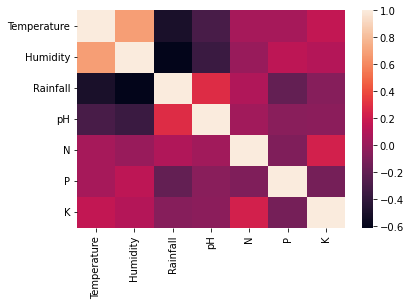

In [60]:
sns.heatmap(data.corr())

# Choosing a model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [62]:
data.head()

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,Clayey,rice,DAP and MOP
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,silty clay,rice,MOP
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,sandy,Coconut,Urea and DAP
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,coastal,Coconut,Urea and MOP


In [63]:
x=data.drop('Fertilizer', axis=1)
y=data['Fertilizer']

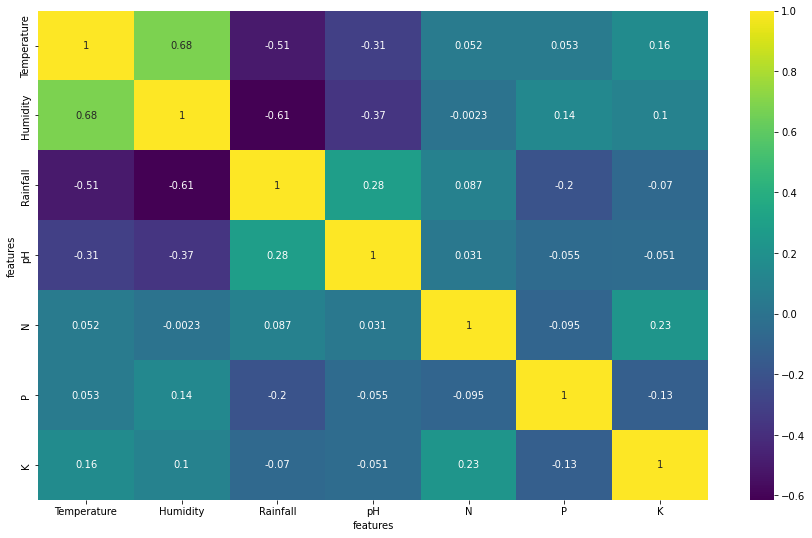

In [64]:
corr = x.corr()
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(corr, annot=True,cmap='viridis' )
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.show()

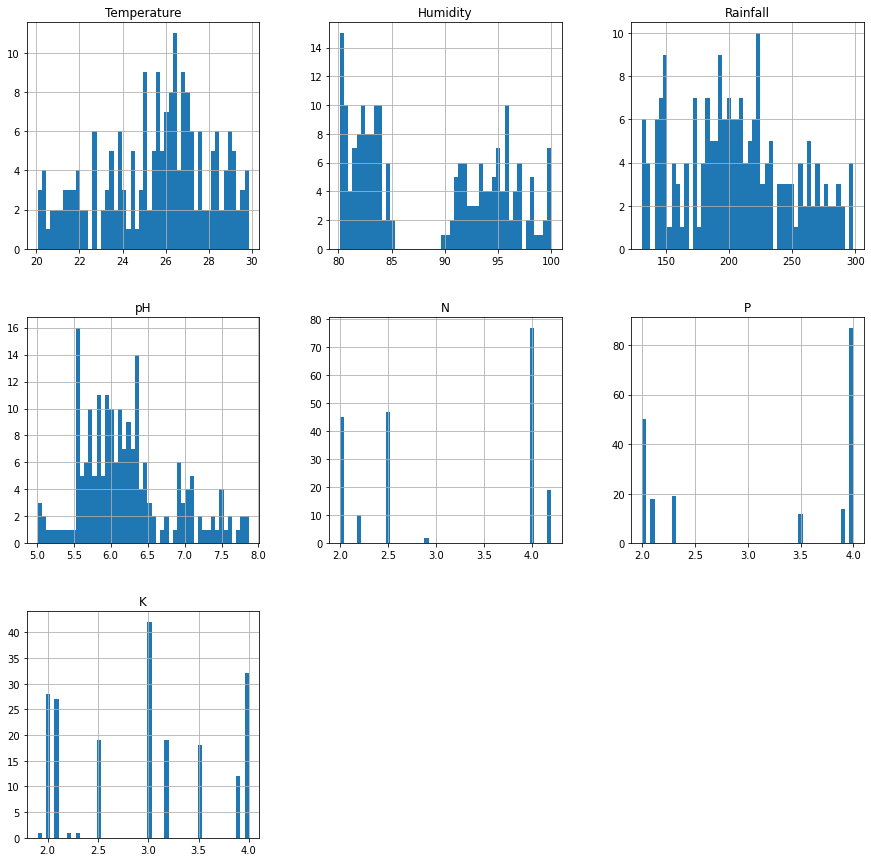

In [65]:
x.hist(bins=50, figsize=(15,15))
plt.show()

<AxesSubplot:xlabel='count', ylabel='Fertilizer'>

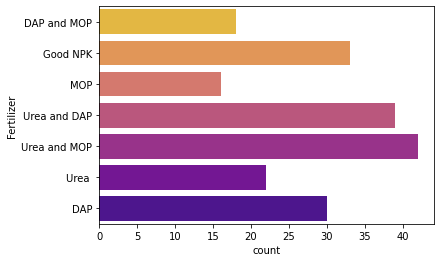

In [66]:
sns.countplot(y=y,data=data,palette="plasma_r")

function  the relationship between features and target 

In [73]:
 def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.histplot(x,ax=axes[0], kde=True, stat="density", linewidth=0)
  
    axes[1].set_title('Checking Outliers')
    sns.boxplot(data=x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = data['Fertilizer'])

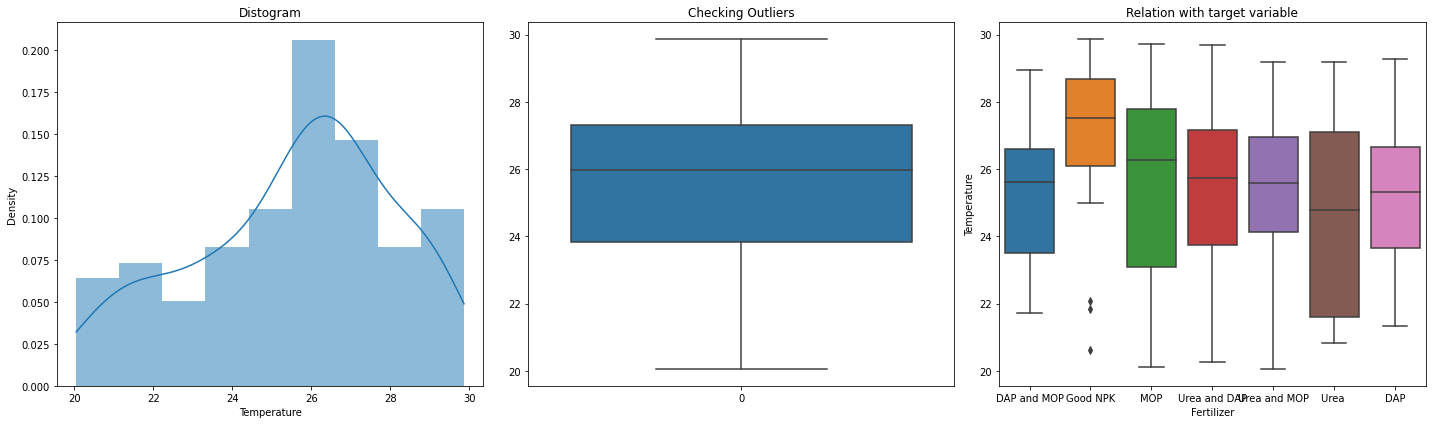

In [74]:
plot_conti(data['Temperature'])

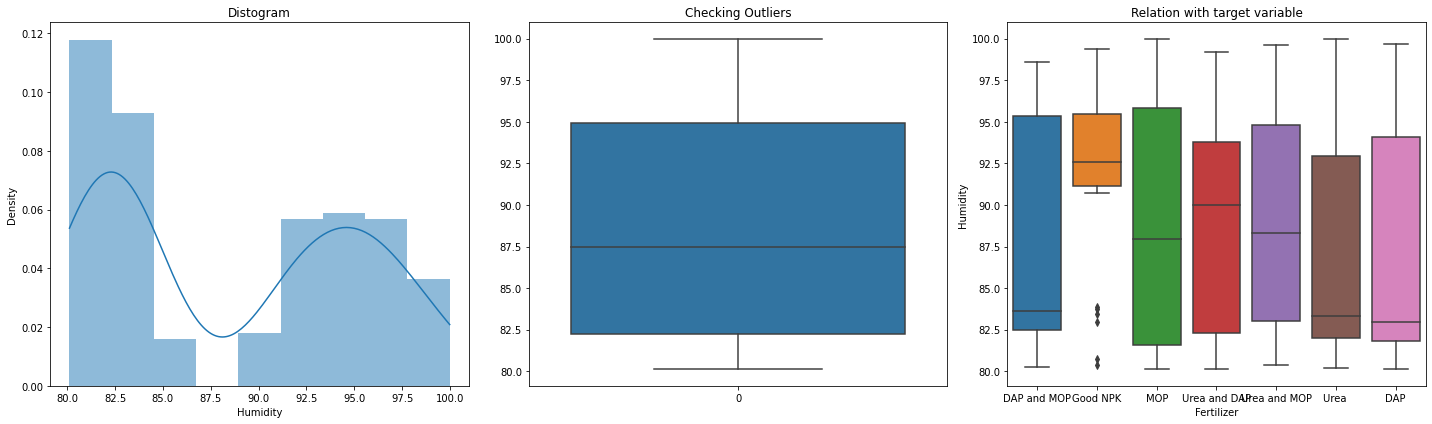

In [75]:
plot_conti(data['Humidity'])

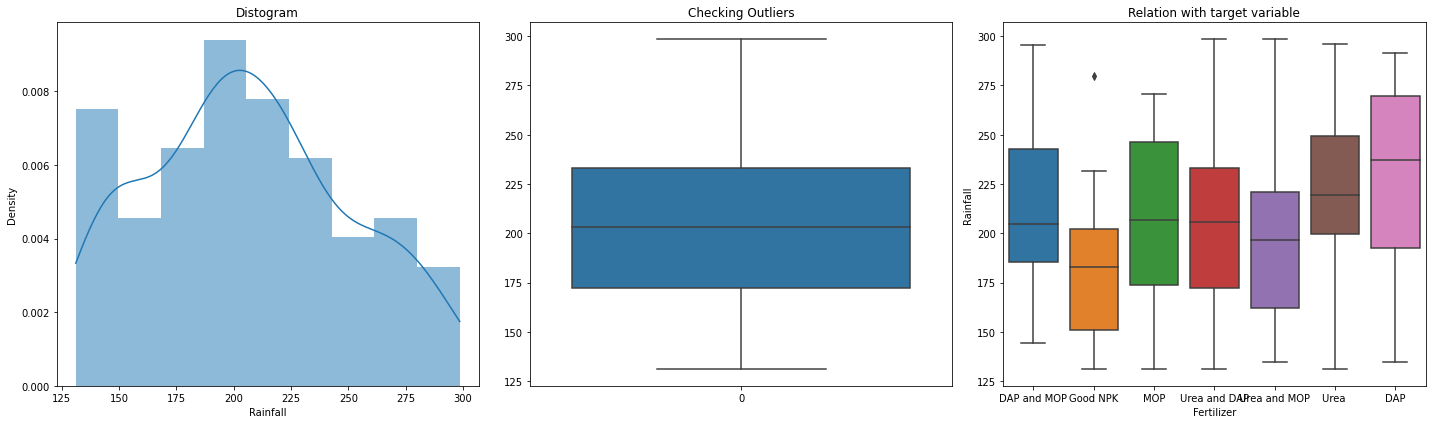

In [77]:
plot_conti(data['Rainfall'])

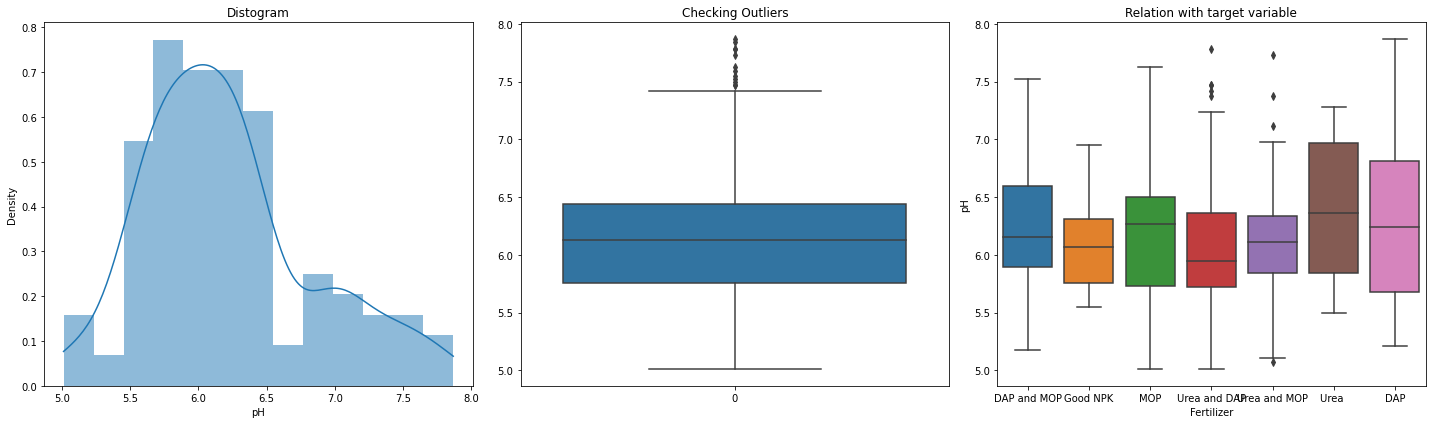

In [78]:
plot_conti(data['pH'])

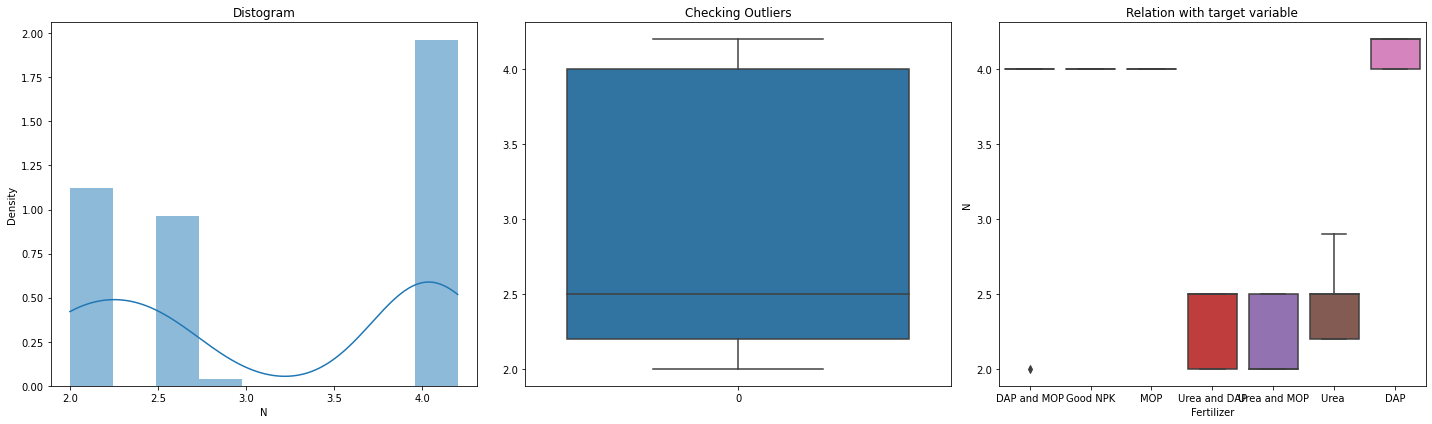

In [79]:
plot_conti(data['N'])

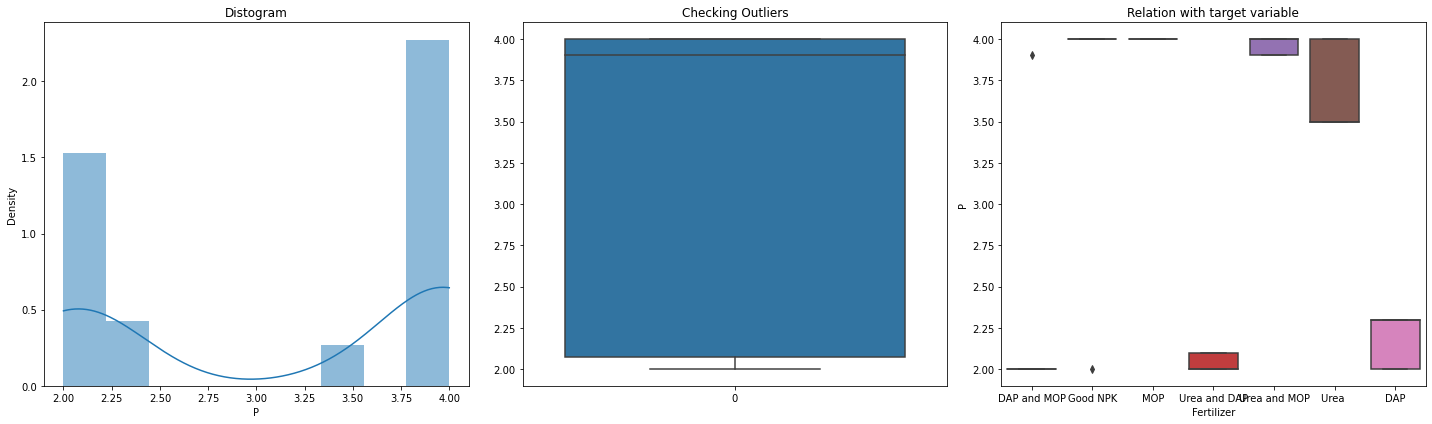

In [81]:
plot_conti(data['P'])

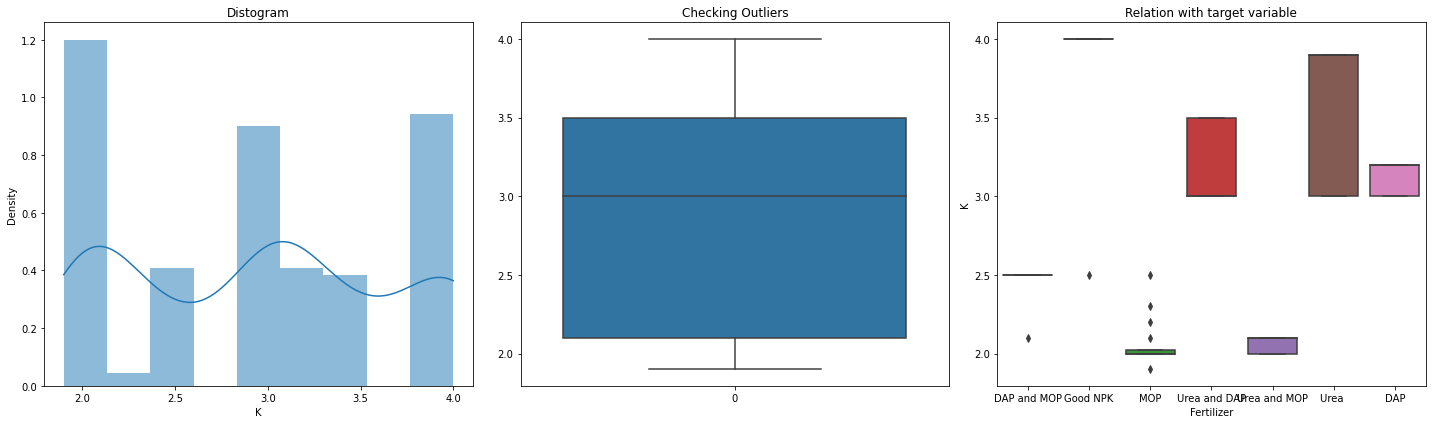

In [83]:
plot_conti(data['K'])

In [84]:
data['Fertilizer']= LabelEncoder().fit_transform(data['Fertilizer'])
data['Soil']= LabelEncoder().fit_transform(data['Soil'])
data['Crop']= LabelEncoder().fit_transform(data['Crop'])

In [86]:
x=data.drop('Fertilizer', axis=1)
y=data['Fertilizer']

In [87]:
scaler = MinMaxScaler()

for col in x.columns:
    x[col] = scaler.fit_transform(x[[col]])

display(x.sample(10))

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop
3,0.511202,0.750252,0.369081,0.188811,0.000000,0.05,0.761905,0.833333,0.0
118,0.385947,0.189325,0.657491,0.860140,0.227273,0.00,0.523810,0.333333,1.0
193,0.568228,0.171702,0.470592,0.181818,0.227273,1.00,0.047619,1.000000,1.0
176,0.156823,0.134441,0.869230,0.433566,1.000000,0.15,0.619048,1.000000,1.0
57,0.772912,0.968278,0.160208,0.479021,0.909091,1.00,1.000000,0.833333,0.0
174,0.695519,0.067472,0.379113,0.395105,0.000000,0.05,0.761905,0.500000,0.0
156,0.344196,0.022659,0.826476,0.472028,0.000000,0.05,0.761905,0.000000,1.0
19,0.846232,0.580564,0.176987,0.185315,0.000000,1.00,0.095238,0.166667,0.0
59,0.884929,0.668681,0.153341,0.213287,0.000000,1.00,0.095238,0.500000,0.0
152,0.839104,0.849950,0.070759,0.335664,0.909091,1.00,1.000000,0.833333,0.0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    shuffle = True, random_state = 42)
acc=[]
model=[]

In [89]:
DT = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)
DT.fit(X_train,y_train)
predicted_values = DT.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x * 100)
print(metrics.classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [90]:
dt_train_accuracy = DT.score(X_train,y_train)
print("Training accuracy = ",dt_train_accuracy)
dt_test_accuracy = DT.score(X_test,y_test)
print("Testing accuracy = ",dt_test_accuracy)

Training accuracy =  1.0
Testing accuracy =  1.0


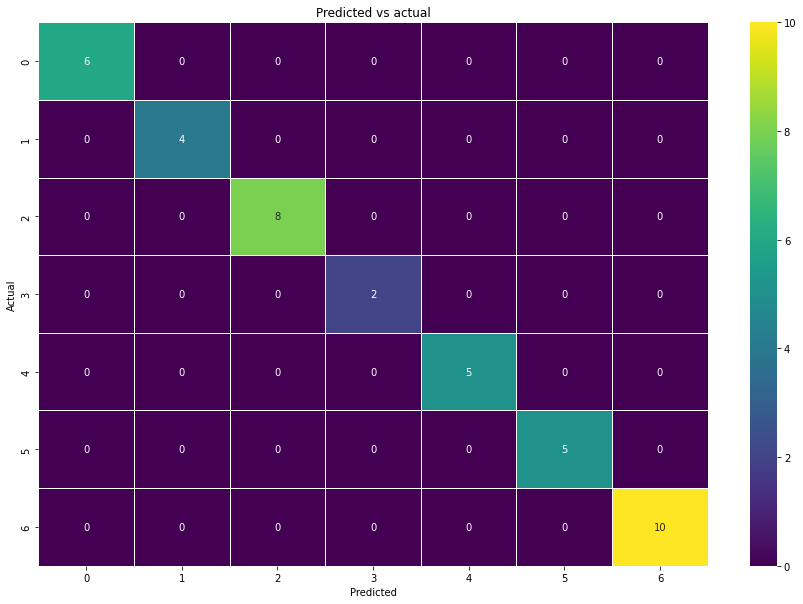

In [91]:
y_pred = DT.predict(X_test)
y_true = y_test
cm_dt = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [92]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)
predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(metrics.classification_report(y_test,predicted_values))

Random Forest Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [93]:
rf_train_accuracy = RF.score(X_train,y_train)
print("Training accuracy = ",rf_train_accuracy)
rf_test_accuracy = RF.score(X_test,y_test)
print("Testing accuracy = ",rf_test_accuracy)

Training accuracy =  1.0
Testing accuracy =  1.0


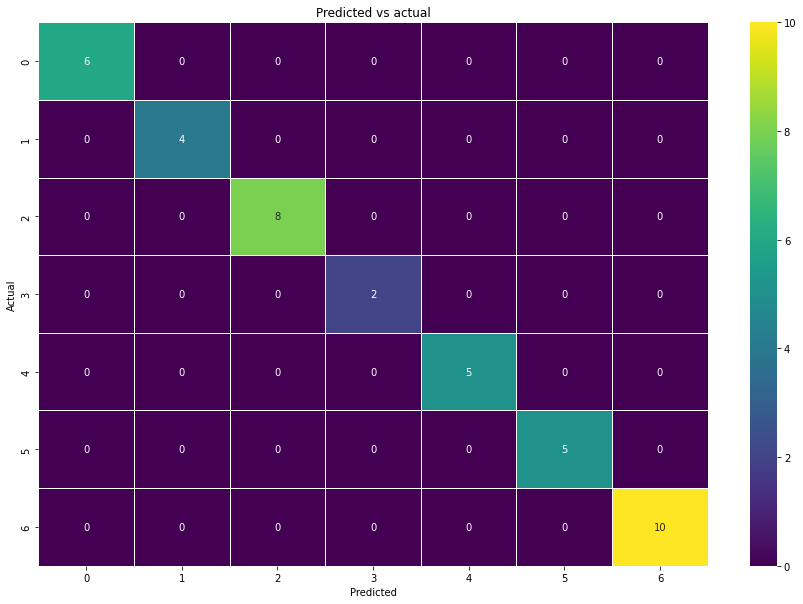

In [94]:
y_pred = RF.predict(X_test)
y_true = y_test
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [95]:
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)
predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)
print(metrics.classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        10

    accuracy                           0.90        40
   macro avg       0.80      0.86      0.82        40
weighted avg       0.84      0.90      0.86        40



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
svm_train_accuracy =SVM.score(X_train,y_train)
print("Training accuracy = ",svm_train_accuracy)
svm_test_accuracy = SVM.score(X_test,y_test)
print("Testing accuracy = ",svm_test_accuracy)

Training accuracy =  0.875
Testing accuracy =  0.9


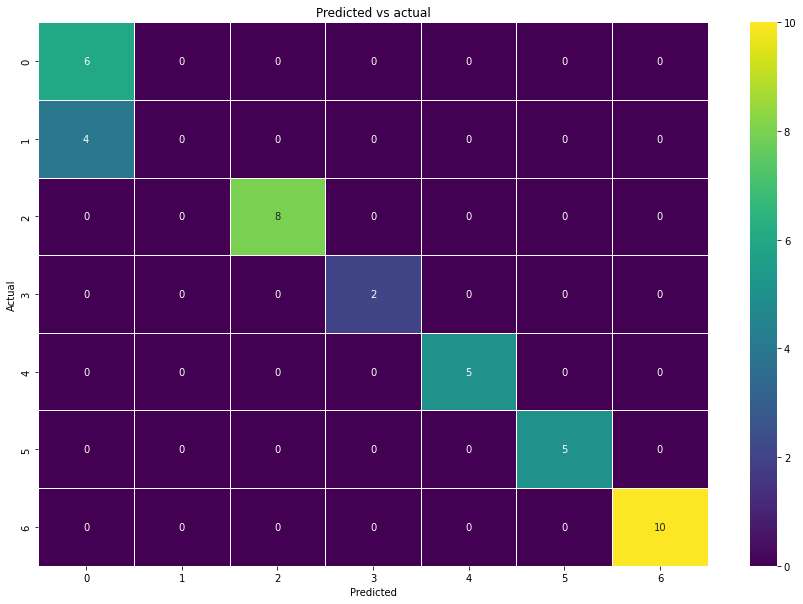

In [97]:
y_pred = SVM.predict(X_test)
y_true = y_test
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [98]:
LogReg = LogisticRegression(random_state=2)
LogReg.fit(X_train,y_train)
predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(metrics.classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.925
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.25      0.40         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        10

    accuracy                           0.93        40
   macro avg       0.95      0.89      0.89        40
weighted avg       0.95      0.93      0.91        40



In [99]:
log_train_accuracy =LogReg.score(X_train,y_train)
print("Training accuracy = ",log_train_accuracy)
log_test_accuracy = LogReg.score(X_test,y_test)
print("Testing accuracy = ",svm_test_accuracy)

Training accuracy =  0.93125
Testing accuracy =  0.9


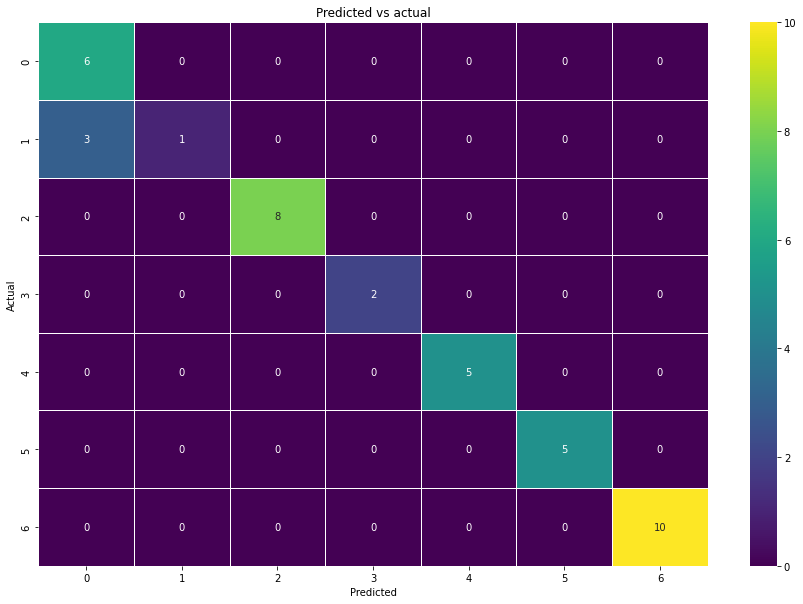

In [100]:
y_pred = LogReg.predict(X_test)
y_true = y_test
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

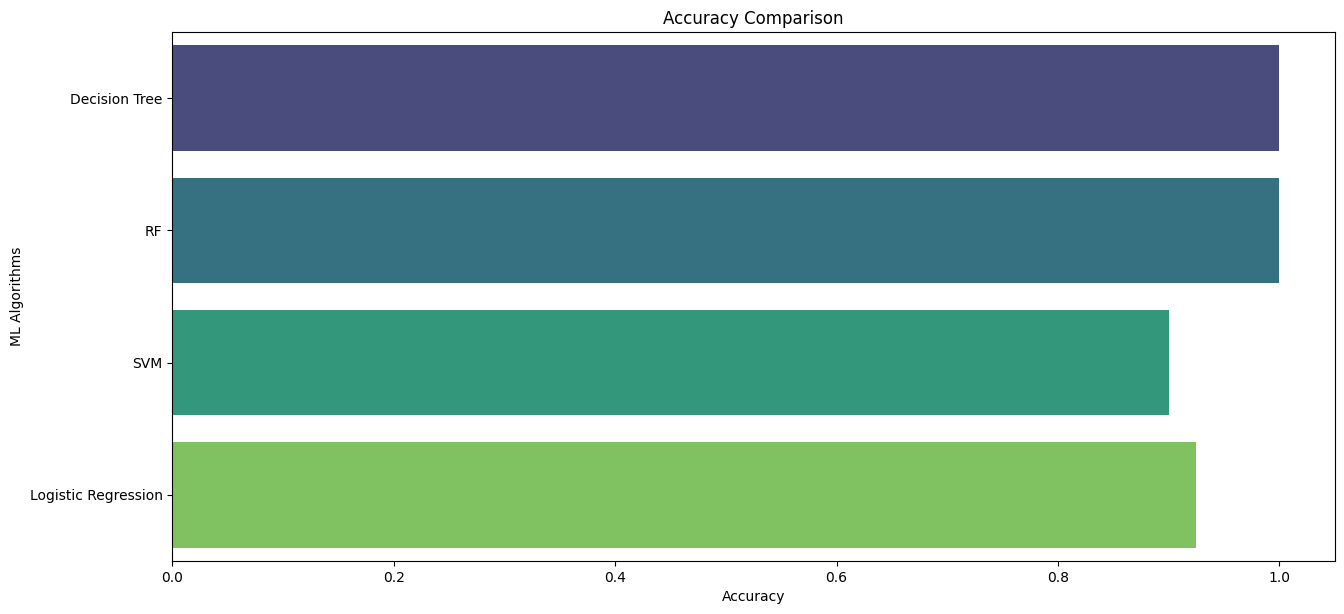

In [101]:
plt.figure(figsize=[15,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

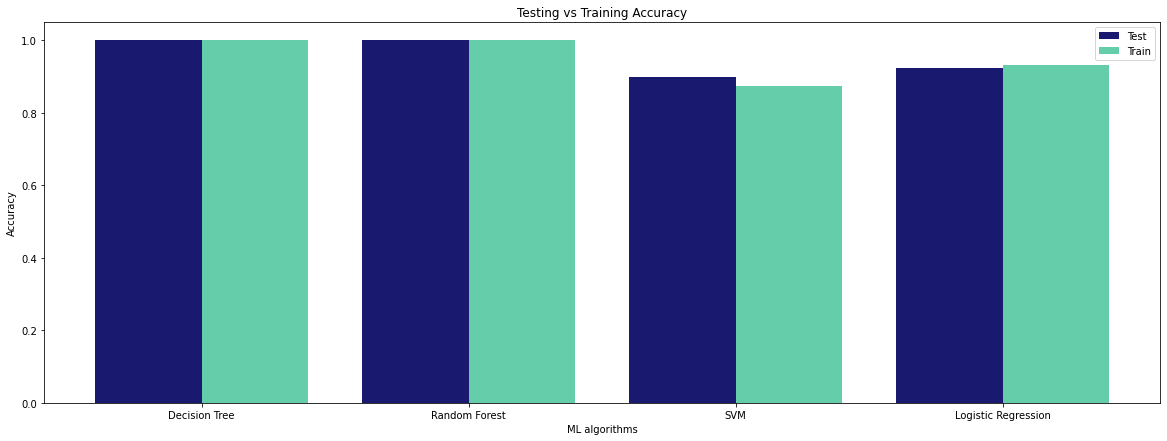

In [102]:
label = ['Decision Tree','Random Forest','SVM','Logistic Regression']
Test = [dt_test_accuracy,rf_test_accuracy,
        svm_test_accuracy,log_test_accuracy]
Train = [ dt_train_accuracy, rf_train_accuracy,
         svm_train_accuracy,log_train_accuracy]
f, ax = plt.subplots(figsize=(20,7)) 
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))
plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.show()

In [103]:
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = DT.predict(data)
print(prediction)

[2]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [104]:
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = RF.predict(data)
print(prediction)

[2]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [105]:
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = SVM.predict(data)
print(prediction)

[3]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [106]:
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = LogReg.predict(data)
print(prediction)

[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Choosing model parameters using grid search 

In [ ]:
from sklearn.model_selection import GridSearchCV